## Notebook Config
- Runtime > change runtime > select T4 GPU
- upload data file to google drive
- run cell below
- In the side panel to the left, locate data file (in drive folder) and copy file path. Paste this file path into the first cell of the Feature Engineering section
- run all cells

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import io

Mounted at /content/drive


## Feature Engineering

In [2]:
df = pd.read_csv('/content/drive/MyDrive/sirio-finance/data/5.Dastaset.csv', parse_dates=True)
df.head(5)

,Unnamed: 0,dt_opened,block_opened,position_days,hour_opened,day_opened,month_opened,weth_borrow_balance,weth_collateral_balance,weth_borrow_balance_share,...,uni_borrow_balance_share,uni_collateral_balance_share,link_borrow_balance,link_collateral_balance,link_borrow_balance_share,link_collateral_balance_share,collateral_usd_balance,borrow_usd_balance,borrow-collateral-ratio,liquidation_event_happened
0,0,26-8-2022,15412448,259.65,1,26,8,0.0,0.00003,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.050321,0.028406,0.564491,False
1,1,26-8-2022,15412659,259.65,2,26,8,0.0,0.00010,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.168353,0.045045,0.267564,False
2,2,26-8-2022,15412833,259.65,2,26,8,0.0,0.00100,0.0,...,0.0,0.0,0,0.0,0.0,0.0,1.684356,0.163989,0.097360,False
3,3,26-8-2022,15414293,259.65,8,26,8,0.0,0.00000,0.0,...,0.0,0.0,0,0.0,0.0,0.0,6448.191888,300.019972,0.046528,False
4,4,26-8-2022,15416186,259.65,15,26,8,0.0,1.00000,0.0,...,0.0,0.0,0,0.0,0.0,0.0,1600.408854,318.895947,0.199259,False


In [3]:
df = df.rename(columns={ df.columns[0]: "loan_id" })
df.head(5)

,loan_id,dt_opened,block_opened,position_days,hour_opened,day_opened,month_opened,weth_borrow_balance,weth_collateral_balance,weth_borrow_balance_share,...,uni_borrow_balance_share,uni_collateral_balance_share,link_borrow_balance,link_collateral_balance,link_borrow_balance_share,link_collateral_balance_share,collateral_usd_balance,borrow_usd_balance,borrow-collateral-ratio,liquidation_event_happened
0,0,26-8-2022,15412448,259.65,1,26,8,0.0,0.00003,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.050321,0.028406,0.564491,False
1,1,26-8-2022,15412659,259.65,2,26,8,0.0,0.00010,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.168353,0.045045,0.267564,False
2,2,26-8-2022,15412833,259.65,2,26,8,0.0,0.00100,0.0,...,0.0,0.0,0,0.0,0.0,0.0,1.684356,0.163989,0.097360,False
3,3,26-8-2022,15414293,259.65,8,26,8,0.0,0.00000,0.0,...,0.0,0.0,0,0.0,0.0,0.0,6448.191888,300.019972,0.046528,False
4,4,26-8-2022,15416186,259.65,15,26,8,0.0,1.00000,0.0,...,0.0,0.0,0,0.0,0.0,0.0,1600.408854,318.895947,0.199259,False


In [4]:
df['dt_opened'] = pd.to_datetime(df['dt_opened'], format='%d-%m-%Y')

In [5]:
df['liquidation_event_happened'] = df['liquidation_event_happened'].astype(int)

In [6]:
#df['health_factor'] = df['borrow_usd_balance'] / df['collateral_usd_balance']

In [7]:
df.head()

,loan_id,dt_opened,block_opened,position_days,hour_opened,day_opened,month_opened,weth_borrow_balance,weth_collateral_balance,weth_borrow_balance_share,...,uni_borrow_balance_share,uni_collateral_balance_share,link_borrow_balance,link_collateral_balance,link_borrow_balance_share,link_collateral_balance_share,collateral_usd_balance,borrow_usd_balance,borrow-collateral-ratio,liquidation_event_happened
0,0,2022-08-26,15412448,259.65,1,26,8,0.0,0.00003,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.050321,0.028406,0.564491,0
1,1,2022-08-26,15412659,259.65,2,26,8,0.0,0.00010,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.168353,0.045045,0.267564,0
2,2,2022-08-26,15412833,259.65,2,26,8,0.0,0.00100,0.0,...,0.0,0.0,0,0.0,0.0,0.0,1.684356,0.163989,0.097360,0
3,3,2022-08-26,15414293,259.65,8,26,8,0.0,0.00000,0.0,...,0.0,0.0,0,0.0,0.0,0.0,6448.191888,300.019972,0.046528,0
4,4,2022-08-26,15416186,259.65,15,26,8,0.0,1.00000,0.0,...,0.0,0.0,0,0.0,0.0,0.0,1600.408854,318.895947,0.199259,0


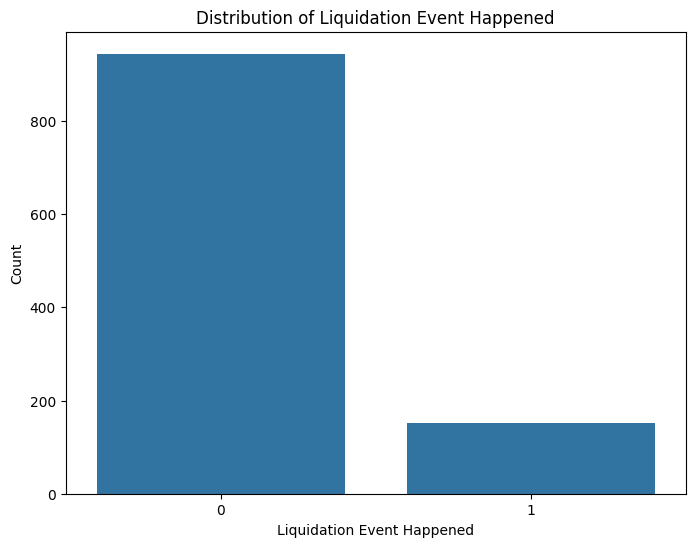

Distribution of liquidation_event_happened:
liquidation_event_happened
0    86.210046
1    13.789954
Name: proportion, dtype: float64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of 'liquidation_event_happened'
liquidation_distribution = df['liquidation_event_happened'].value_counts(normalize=True)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='liquidation_event_happened', data=df)
plt.title('Distribution of Liquidation Event Happened')
plt.xlabel('Liquidation Event Happened')
plt.ylabel('Count')
plt.show()

# Print the distribution in percentage
print("Distribution of liquidation_event_happened:")
print(liquidation_distribution * 100)


## Data Splitting (Train/Test)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

In [10]:
X = df.drop(['liquidation_event_happened'], axis=1)
y = df['liquidation_event_happened']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((876, 34), (219, 34), (876,), (219,))

In [13]:
X_train.head()

,loan_id,dt_opened,block_opened,position_days,hour_opened,day_opened,month_opened,weth_borrow_balance,weth_collateral_balance,weth_borrow_balance_share,...,uni_collateral_balance,uni_borrow_balance_share,uni_collateral_balance_share,link_borrow_balance,link_collateral_balance,link_borrow_balance_share,link_collateral_balance_share,collateral_usd_balance,borrow_usd_balance,borrow-collateral-ratio
6,6,2022-08-29,15432739,259.65,7,29,8,0.0,1.000000e-07,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.000145,0.000087,0.598394
575,575,2023-12-27,18878786,259.65,18,27,12,0.0,3.002724e-01,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,703.376393,201.730092,0.286802
821,821,2024-03-21,19485435,259.65,20,21,3,0.0,4.092536e-01,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,1423.098508,1000.392049,0.702968
1063,1063,2024-05-06,19809983,259.65,8,6,5,0.0,6.061845e+01,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,194299.235950,62478.310175,0.321557
905,905,2024-04-12,19641730,6.00,19,12,4,0.0,0.000000e+00,0.0,...,25000.0,0.0,1.0,0,0.0,0.0,0.0,199633.116195,148639.750414,0.744565


In [14]:
!pip install imbalanced-learn

In [15]:
import imblearn

In [16]:
oversampler = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [17]:
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

In [18]:
X_train_over.shape, X_test.shape, y_train_over.shape, y_test.shape

((1502, 34), (219, 34), (1502,), (219,))

In [19]:
y_train_over.head()

,liquidation_event_happened
0,0
1,0
2,0
3,0
4,1


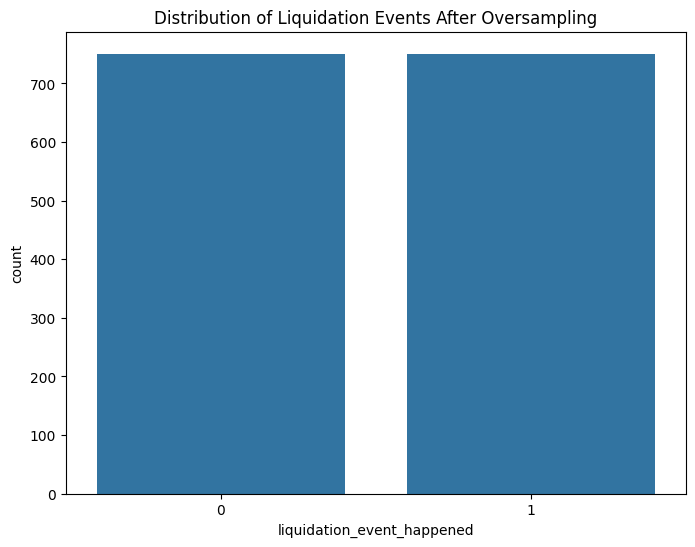

In [20]:
liquidation_distribution = y_train_over.value_counts(normalize=True)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_over)
plt.title('Distribution of Liquidation Events After Oversampling')
plt.show()

In [21]:
X_train_over['year'] = X_train_over['dt_opened'].dt.year
X_train_over['month'] = X_train_over['dt_opened'].dt.month
X_train_over['day'] = X_train_over['dt_opened'].dt.day
X_train_over['hour'] = X_train_over['dt_opened'].dt.hour


X_test['year'] = X_test['dt_opened'].dt.year
X_test['month'] = X_test['dt_opened'].dt.month
X_test['day'] = X_test['dt_opened'].dt.day
X_test['hour'] = X_test['dt_opened'].dt.hour

In [22]:
numerical_cols = X_train_over.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_over[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

## Logistic Regression

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train_over)

LogisticRegression(random_state=42)

In [ ]:
y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
log_loss_value = log_loss(y_test, y_pred_probs)
print(f'Log Loss: {log_loss_value:.4f}')

Log Loss: 0.1982


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 1/200 - Train Log Loss: 0.4393 - Test Log Loss: 0.4619
Epoch 2/200 - Train Log Loss: 0.3625 - Test Log Loss: 0.4030
Epoch 3/200 - Train Log Loss: 0.3472 - Test Log Loss: 0.3925
Epoch 4/200 - Train Log Loss: 0.3069 - Test Log Loss: 0.3464
Epoch 5/200 - Train Log Loss: 0.3046 - Test Log Loss: 0.3439
Epoch 6/200 - Train Log Loss: 0.2780 - Test Log Loss: 0.3148
Epoch 7/200 - Train Log Loss: 0.2348 - Test Log Loss: 0.2740
Epoch 8/200 - Train Log Loss: 0.2216 - Test Log Loss: 0.2247
Epoch 9/200 - Train Log Loss: 0.2090 - Test Log Loss: 0.2221


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 10/200 - Train Log Loss: 0.2054 - Test Log Loss: 0.2301
Epoch 11/200 - Train Log Loss: 0.2035 - Test Log Loss: 0.2274
Epoch 12/200 - Train Log Loss: 0.2007 - Test Log Loss: 0.2202
Epoch 13/200 - Train Log Loss: 0.1989 - Test Log Loss: 0.2193
Epoch 14/200 - Train Log Loss: 0.1961 - Test Log Loss: 0.2167
Epoch 15/200 - Train Log Loss: 0.1944 - Test Log Loss: 0.2152
Epoch 16/200 - Train Log Loss: 0.1895 - Test Log Loss: 0.1992
Epoch 17/200 - Train Log Loss: 0.1858 - Test Log Loss: 0.1996
Epoch 18/200 - Train Log Loss: 0.1852 - Test Log Loss: 0.2015
Epoch 19/200 - Train Log Loss: 0.1850 - Test Log Loss: 0.2017
Epoch 20/200 - Train Log Loss: 0.1844 - Test Log Loss: 0.2036
Epoch 21/200 - Train Log Loss: 0.1841 - Test Log Loss: 0.2030
Epoch 22/200 - Train Log Loss: 0.1833 - Test Log Loss: 0.1984
Epoch 23/200 - Train Log Loss: 0.1829 - Test Log Loss: 0.2003
Epoch 24/200 - Train Log Loss: 0.1828 - Test Log Loss: 0.2005
Epoch 25/200 - Train Log Loss: 0.1824 - Test Log Loss: 0.2020
Epoch 26

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 28/200 - Train Log Loss: 0.1818 - Test Log Loss: 0.2001
Epoch 29/200 - Train Log Loss: 0.1817 - Test Log Loss: 0.2003
Epoch 30/200 - Train Log Loss: 0.1814 - Test Log Loss: 0.2007
Epoch 31/200 - Train Log Loss: 0.1813 - Test Log Loss: 0.2005
Epoch 32/200 - Train Log Loss: 0.1810 - Test Log Loss: 0.1997
Epoch 33/200 - Train Log Loss: 0.1809 - Test Log Loss: 0.1998
Epoch 34/200 - Train Log Loss: 0.1808 - Test Log Loss: 0.2000
Epoch 35/200 - Train Log Loss: 0.1808 - Test Log Loss: 0.2000
Epoch 36/200 - Train Log Loss: 0.1807 - Test Log Loss: 0.2000
Epoch 37/200 - Train Log Loss: 0.1803 - Test Log Loss: 0.1999
Epoch 38/200 - Train Log Loss: 0.1802 - Test Log Loss: 0.1998


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 39/200 - Train Log Loss: 0.1801 - Test Log Loss: 0.1997
Epoch 40/200 - Train Log Loss: 0.1801 - Test Log Loss: 0.1997
Epoch 41/200 - Train Log Loss: 0.1801 - Test Log Loss: 0.1997
Epoch 42/200 - Train Log Loss: 0.1799 - Test Log Loss: 0.1996
Epoch 43/200 - Train Log Loss: 0.1799 - Test Log Loss: 0.1996
Epoch 44/200 - Train Log Loss: 0.1794 - Test Log Loss: 0.1995
Epoch 45/200 - Train Log Loss: 0.1793 - Test Log Loss: 0.1994
Epoch 46/200 - Train Log Loss: 0.1792 - Test Log Loss: 0.1994
Epoch 47/200 - Train Log Loss: 0.1792 - Test Log Loss: 0.1993
Epoch 48/200 - Train Log Loss: 0.1791 - Test Log Loss: 0.1993
Epoch 49/200 - Train Log Loss: 0.1791 - Test Log Loss: 0.1993
Epoch 50/200 - Train Log Loss: 0.1791 - Test Log Loss: 0.1993
Epoch 51/200 - Train Log Loss: 0.1791 - Test Log Loss: 0.1993


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 52/200 - Train Log Loss: 0.1790 - Test Log Loss: 0.1993
Epoch 53/200 - Train Log Loss: 0.1788 - Test Log Loss: 0.1992
Epoch 54/200 - Train Log Loss: 0.1788 - Test Log Loss: 0.1992
Epoch 55/200 - Train Log Loss: 0.1788 - Test Log Loss: 0.1991
Epoch 56/200 - Train Log Loss: 0.1788 - Test Log Loss: 0.1991
Epoch 57/200 - Train Log Loss: 0.1787 - Test Log Loss: 0.1991
Epoch 58/200 - Train Log Loss: 0.1784 - Test Log Loss: 0.1990
Epoch 59/200 - Train Log Loss: 0.1784 - Test Log Loss: 0.1989


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 60/200 - Train Log Loss: 0.1784 - Test Log Loss: 0.1989
Epoch 61/200 - Train Log Loss: 0.1784 - Test Log Loss: 0.1989
Epoch 62/200 - Train Log Loss: 0.1784 - Test Log Loss: 0.1989
Epoch 63/200 - Train Log Loss: 0.1783 - Test Log Loss: 0.1989
Epoch 64/200 - Train Log Loss: 0.1783 - Test Log Loss: 0.1989
Epoch 65/200 - Train Log Loss: 0.1783 - Test Log Loss: 0.1989
Epoch 66/200 - Train Log Loss: 0.1783 - Test Log Loss: 0.1989
Epoch 67/200 - Train Log Loss: 0.1779 - Test Log Loss: 0.1987


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 68/200 - Train Log Loss: 0.1779 - Test Log Loss: 0.1987
Epoch 69/200 - Train Log Loss: 0.1779 - Test Log Loss: 0.1987
Epoch 70/200 - Train Log Loss: 0.1779 - Test Log Loss: 0.1986


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 71/200 - Train Log Loss: 0.1779 - Test Log Loss: 0.1986
Epoch 72/200 - Train Log Loss: 0.1779 - Test Log Loss: 0.1986
Epoch 73/200 - Train Log Loss: 0.1779 - Test Log Loss: 0.1986


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 74/200 - Train Log Loss: 0.1779 - Test Log Loss: 0.1986
Epoch 75/200 - Train Log Loss: 0.1779 - Test Log Loss: 0.1986
Epoch 76/200 - Train Log Loss: 0.1779 - Test Log Loss: 0.1986
Epoch 77/200 - Train Log Loss: 0.1779 - Test Log Loss: 0.1986


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 78/200 - Train Log Loss: 0.1778 - Test Log Loss: 0.1986
Epoch 79/200 - Train Log Loss: 0.1778 - Test Log Loss: 0.1986
Epoch 80/200 - Train Log Loss: 0.1778 - Test Log Loss: 0.1986
Epoch 81/200 - Train Log Loss: 0.1778 - Test Log Loss: 0.1986
Epoch 82/200 - Train Log Loss: 0.1778 - Test Log Loss: 0.1986


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 83/200 - Train Log Loss: 0.1778 - Test Log Loss: 0.1986
Epoch 84/200 - Train Log Loss: 0.1778 - Test Log Loss: 0.1986
Epoch 85/200 - Train Log Loss: 0.1778 - Test Log Loss: 0.1986
Epoch 86/200 - Train Log Loss: 0.1778 - Test Log Loss: 0.1986
Epoch 87/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1983
Epoch 88/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1983
Epoch 89/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1983
Epoch 90/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1983
Epoch 91/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 92/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 93/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 94/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 95/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 96/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 97/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 98/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 99/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 100/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 101/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 102/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 103/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 104/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 105/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 106/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 107/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 108/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 109/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 110/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 111/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 112/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 113/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 114/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 115/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 116/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 117/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 118/200 - Train Log Loss: 0.1776 - Test Log Loss:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 120/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 121/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 122/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 123/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 124/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 125/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 126/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 127/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 128/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 129/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 130/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 131/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 132/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 133/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 134/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 135/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 136/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 137/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 138/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 139/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 140/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 141/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 142/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 143/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 144/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 145/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 146/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 147/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 148/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 149/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 150/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 151/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 152/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 153/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 154/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 155/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 156/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 157/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 158/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 159/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 160/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 161/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 162/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 163/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 164/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 165/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 166/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 167/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 168/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 169/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 170/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 171/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 172/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 173/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 174/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 175/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 176/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 177/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 178/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 179/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 180/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 181/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 182/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 183/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 184/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 185/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 186/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982
Epoch 187/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1982


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 188/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981
Epoch 189/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981
Epoch 190/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981
Epoch 191/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981
Epoch 192/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981
Epoch 193/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981
Epoch 194/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 195/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981
Epoch 196/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981
Epoch 197/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981
Epoch 198/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981
Epoch 199/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981
Epoch 200/200 - Train Log Loss: 0.1776 - Test Log Loss: 0.1981


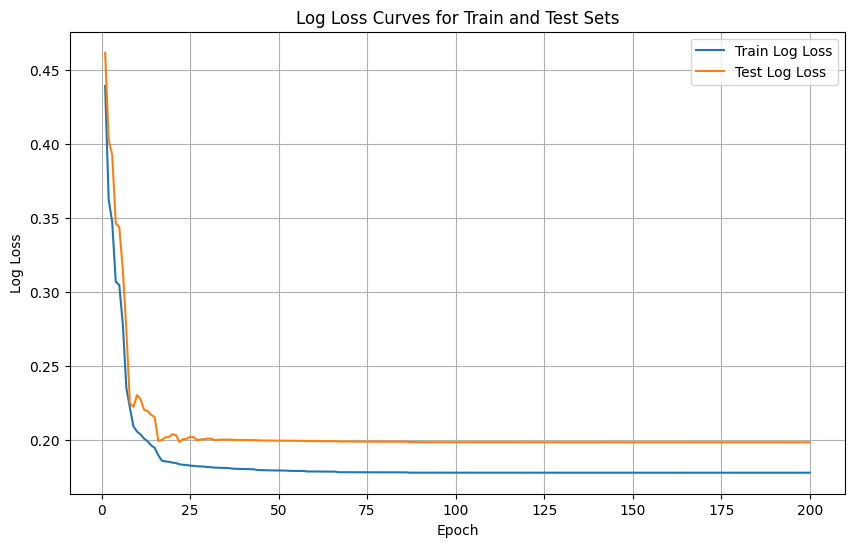

In [ ]:
train_log_losses = []
test_log_losses = []

# Initialize the model
model_1 = LogisticRegression(random_state=42, max_iter=1, warm_start=True)

# Scale the features
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Number of epochs
epochs = 200

# Training loop
for epoch in range(epochs):
    # Train the model for one epoch
    model_1.fit(X_train_scaled, y_train_over)

    # Predict probabilities
    y_train_pred_probs = model_1.predict_proba(X_train_scaled)[:, 1]
    y_test_pred_probs = model_1.predict_proba(X_test_scaled)[:, 1]

    # Calculate log loss for both train and test sets
    train_log_loss = log_loss(y_train_over, y_train_pred_probs)
    test_log_loss = log_loss(y_test, y_test_pred_probs)

    # Append log loss values to the lists
    train_log_losses.append(train_log_loss)
    test_log_losses.append(test_log_loss)

    # Optionally, print the log loss for every epoch
    print(f'Epoch {epoch + 1}/{epochs} - Train Log Loss: {train_log_loss:.4f} - Test Log Loss: {test_log_loss:.4f}')

# Plot the log loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_log_losses, label='Train Log Loss')
plt.plot(range(1, epochs + 1), test_log_losses, label='Test Log Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Log Loss Curves for Train and Test Sets')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_scaled, y_train_over)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_probs_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
log_loss_rf = log_loss(y_test, y_pred_probs_rf)
print(f'Random Forest Log Loss:{log_loss_rf:.4f}')

Random Forest Log Loss:0.1337


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_scaled, y_train_over)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_probs_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
log_loss_gb = log_loss(y_test, y_pred_probs_gb)

print(f'Gradient Boosting Log Loss: {log_loss_gb:.4f}')

Gradient Boosting Log Loss: 0.1425


## XGBoost + model params

In [23]:
!pip install xgboost==1.7.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1


In [26]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [27]:
param_grid = {
    'n_estimators': [100, 500, 1000, 1500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'colsample_bytree': [0.6, 0.8, 1],
    'gamma': [0, 1, 5],
    'subsample': [0.6, 0.8, 1],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

In [28]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [29]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [30]:
random_search.fit(X_train_scaled, y_train_over)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 500, 1000, 1500],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1]},
                   random_state=42, scoring='f1', verbose=2)

In [31]:
print("Best parameters:", random_search.best_params_)
print("Best f1 score:", random_search.best_score_)

Best parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.6}
Best f1 score: 0.9829976009542574


In [32]:
xgb_model = xgb.XGBClassifier(
    subsample= 0.8,
    min_child_weight= 3,
    reg_lambda= 1,
    reg_alpha= 0,
    n_estimators=100,
    max_depth=9,
    learning_rate=0.3,
    colsample_bytree= 0.6,
    gamma= 0,
    random_state=42)
xgb_model.fit(X_train_scaled, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [33]:
y_pred_probs_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

In [34]:
log_loss_xgb = log_loss(y_test, y_pred_probs_xgb)
print(f'X Gradient Boosting Log Loss: {log_loss_xgb:.4f}')

X Gradient Boosting Log Loss: 0.0963


## Deeplearning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

# Input layer + 1st hidden layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# 2nd hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (1 neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train_over, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8873 - loss: 0.2987 - val_accuracy: 0.8813 - val_loss: 0.2030
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9304 - loss: 0.1668 - val_accuracy: 0.9224 - val_loss: 0.1694
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9511 - loss: 0.1353 - val_accuracy: 0.9132 - val_loss: 0.1660
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9532 - loss: 0.1211 - val_accuracy: 0.9087 - val_loss: 0.1775
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9557 - loss: 0.1227 - val_accuracy: 0.9132 - val_loss: 0.1988
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9543 - loss: 0.1063 - val_accuracy: 0.9132 - val_loss: 0.2420
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9561 - loss: 0.1076 - val_accuracy: 0.9315 - val_loss: 0.1863
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9783 - loss: 0.0711 - val_accuracy: 0.9224 - val_loss:

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9388 - loss: 0.3282 
Test Accuracy: 94.52%
